# Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages. <span><a href='https://www.gov.za/about-sa/south-africas-people'>From South African Government</a><span>

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media'></img>
    
With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this notebook, we will build machine learning models for identifying the different languages from text data supplied.

This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Selection</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics and Model assessments
from sklearn.metrics import classification_report

# Libraries for Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

<a id="two"></a>
## 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>

In [2]:
# This prevents pandas from truncating columns with long text values
pd.set_option('max_colwidth', None)

df = pd.read_csv('train_set.csv')
df

lang_id  \
0         xho   
1         xho   
2         eng   
3         nso   
4         ven   
...       ...   
32995     tsn   
32996     sot   
32997     eng   
32998     xho   
32999     sot   

                                                                                                                                                                                                                                                                                                             text  
0                                                                                    umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika  
1                                                    i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo  
2                                        the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months  
3                                                                                       o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj  
4                                                                 khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso  
...                                                                                                                                                                                                                                                                                                           ...  
32995                            popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham  
32996  modise mosadi na o ntse o sa utlwe hore thabang o rata ho iketsa sengangele jwang hona jwale ke mona o se a bolela ka moo a batlang ho lokollelwa ngwana wa hae ka teng wena jwale o batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore a mathakake le banana ba motse oo kaofela  
32997                                                                              closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address  
32998                                                                        nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa  
32999                                                                                                mafapha a mang le ona a lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisi-kakaretso wa lefapha  

[33000 rows x 2 columns]

In [3]:
df_test = pd.read_csv('test_set.csv')
df_test

index  \
0         1   
1         2   
2         3   
3         4   
4         5   
...     ...   
5677   5678   
5678   5679   
5679   5680   
5680   5681   
5681   5682   

                                                                                                                                                                                                                                                                                                                                   text  
0                                                                                                                                                                                                                                                                            Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo.  
1                                                                                                                                                                                                                         Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.  
2                                                                                                                                                                                                                                                                                            Tshivhumbeo tshi fana na ngano dza vhathu.  
3                                                                                                                                                                                                                                                                          Kube inja nelikati betingevakala kutsi titsini naticocisana.  
4                                                                                                                                                                                                                                                                                                         Winste op buitelandse valuta.  
...                                                                                                                                                                                                                                                                                                                                 ...  
5677                                                                                                                                                                                                                                                                                                   You mark your ballot in private.  
5678  Ge o ka kgetha ka bowena go se šomiše Mofani ka tirelo yo a kgethilwego wa GEMS (DSP), gona tefelo mmogo e tla šomišwa. Tefelo mmogo yeo e ka nna ya ba phapano magareng ga hlwahlwa ya tirelo le yeo GEMS e ka bego e e lefeletše ge nkabe o šomišitše GEMS DSP Goba persente ya tefelo mmogo go ya ka Melao ya Setlamo ya GEMS.  
5679                                                                                                                                                                                            E Ka kopo etsa kgetho ya hao ka hloko, hobane ha o na ho kgona ho fetola kgetho ena hara selemo ntle le tumello ya Boto ya Batshwaredi.  
5680                                                                                                                                                                        TB ke bokudi ba PMB, mme Morero o tla lefella tlhahlobo ya ho sheba lefu lena. Leha ho le jwalo, o tlameha ho fumana kalafo ya hao ya TB ditsing tsa Mmuso.  
5681                                                                                                                                                                                               

<a id="three"></a>
## 3. Exploratory Data Analysis EDA
<a href=#cont>Back to Table of Contents</a>

We first check for the presense of null values 

It seems there are no null values in the dataset

In [4]:
df.isnull().sum()

lang_id    0
text       0
dtype: int64

Since the model is expected to learn the difference between languages, it might help leave some special characters in the text as this also helps to differentiate the text of different languages

We now have a look at the the number of observations in the different classes.

We can plot a bar graph for that.

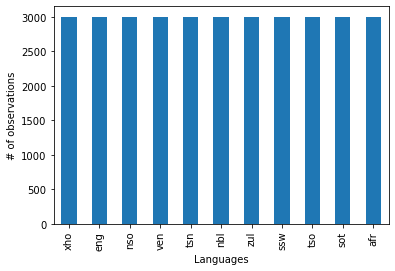

In [5]:
df['lang_id'].value_counts().plot(kind = 'bar')
plt.ylabel("# of observations")
plt.xlabel("Languages")
plt.show()

The data shows perfect balance in the number of observations between the different classes. This eliminates the problems associated with dealing with unbalanced data.

To properly explore the nuances present in the text of the different languages, It might be helpful to split the dataset by language and observe each set separately

In [6]:
# generates a list of labels from the unique values in lang_id
labels = df.lang_id.unique()

# We now create a section object with the labels as keys and values as the subset of 
# the dataset corresponding to the label
section = {}
for label in labels:
    section[label] = df[df.lang_id == label]

In [7]:
# This is a helper function to generate a world cloud using the text column in the dataframe
def word_cloud (df, column_name, title):
    wc = WordCloud()
    text = str(df[column_name].values)
    msg_cloud = wc.generate(text)
    
    #plot wordcloud
    fig,ax = plt.subplots(figsize=(15,15))
    ax.plot
    plt.imshow(msg_cloud)
    plt.axis('off')
    plt.title(title)
    plt.show
    
    return wc

We first generate a world cloud using the entire dataset to see which words have the greatest frequency in the corpus

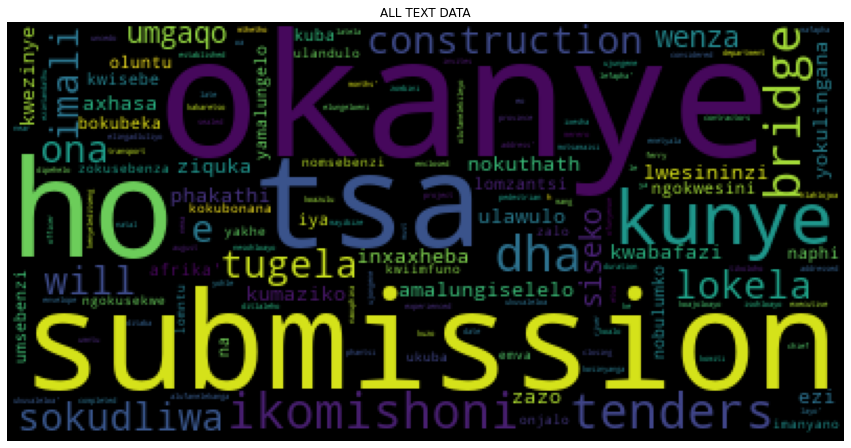

In [8]:
word_cloud(df, 'text', 'ALL TEXT DATA')

We can easily see that words like `submission` and `Okanye` are quite popular in the dataset. Let us now drill down and see which languages these words belong to by creating more world clouds using the subset of data we created earlier

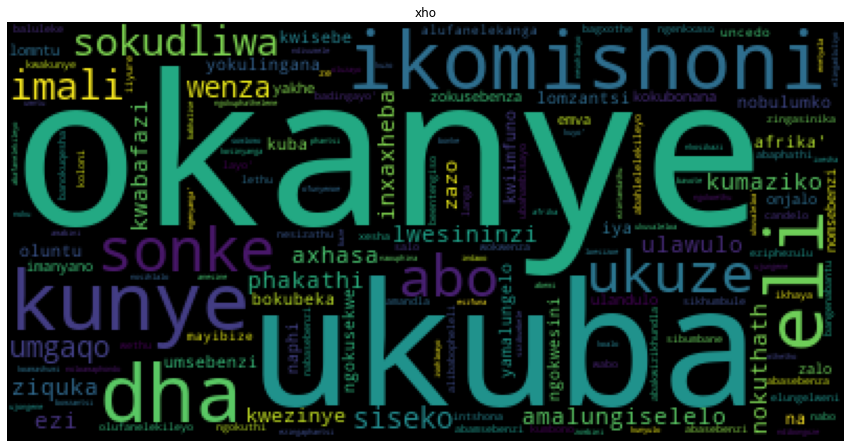

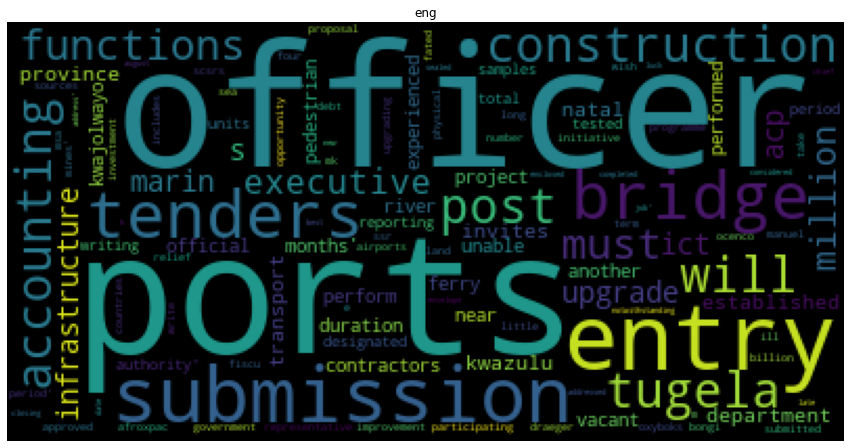

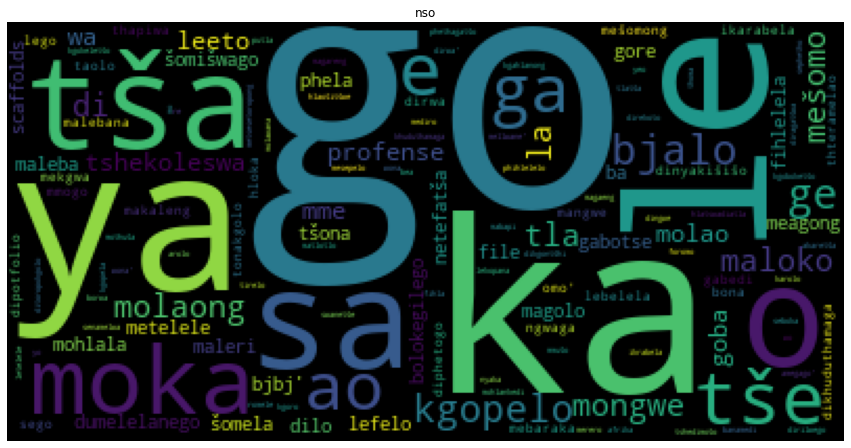

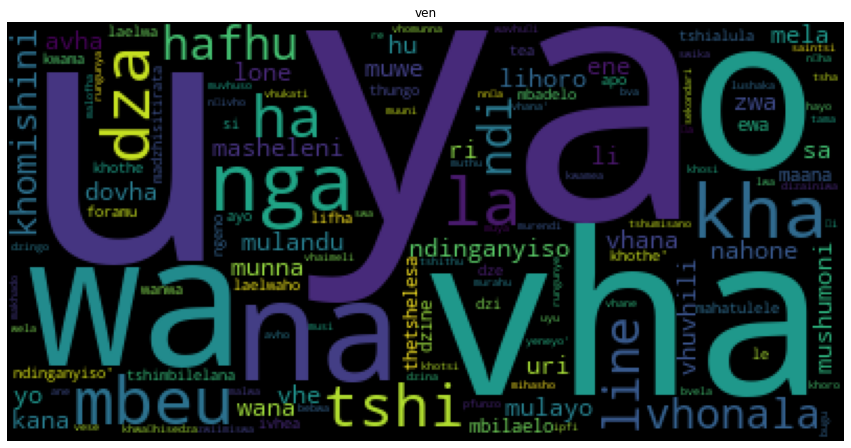

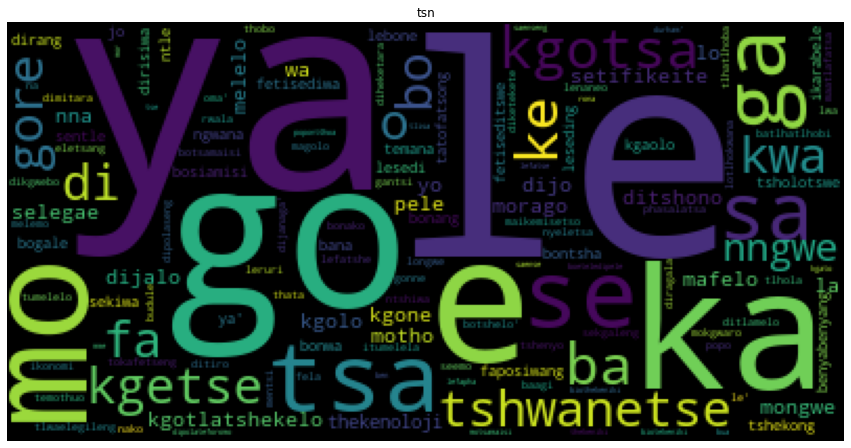

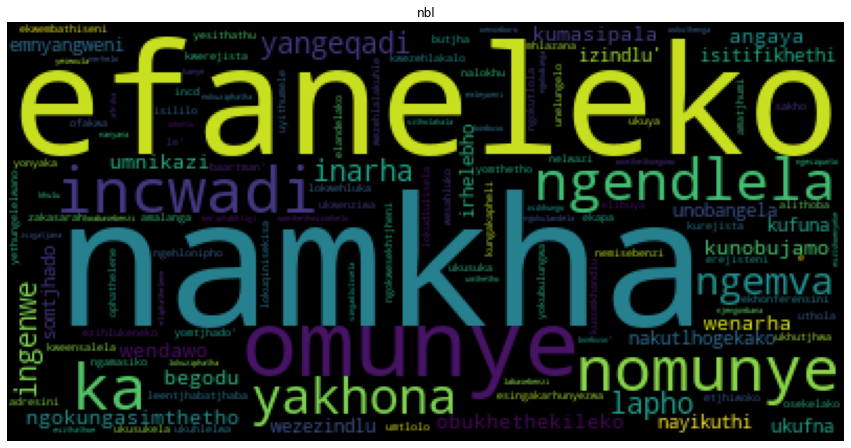

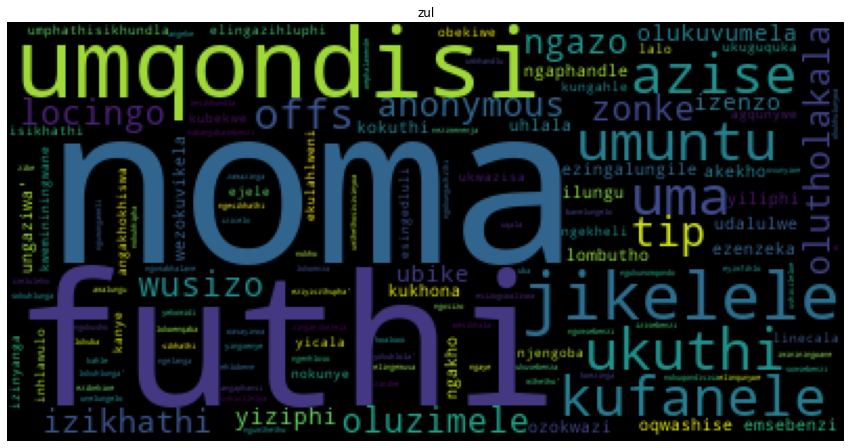

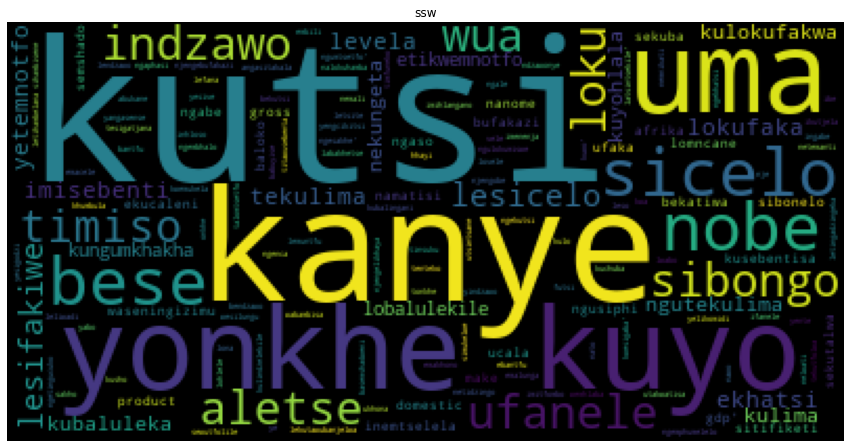

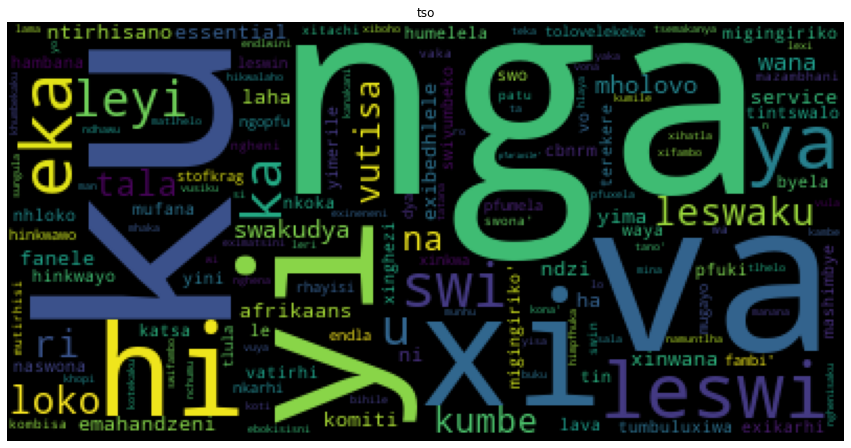

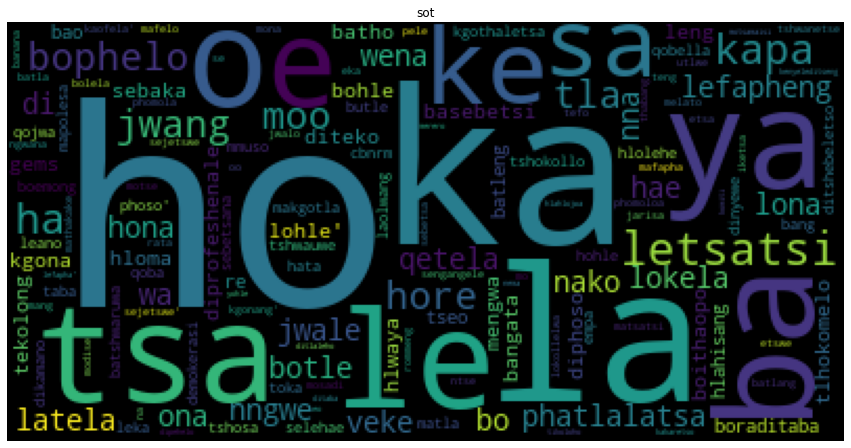

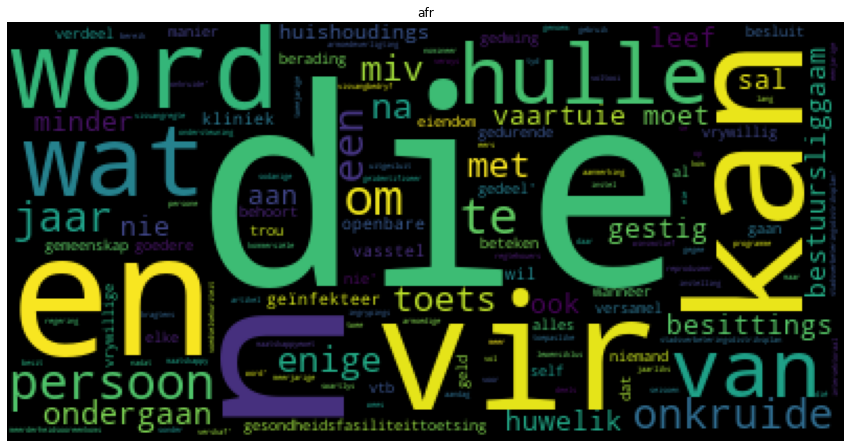

In [10]:
for section_label in section:
    word_cloud(section[section_label], 'text', section_label)

By carefully observing the worldcloud for the different languages, We notice that some words are are used more frequently and sometimes exclusively by one language.

Here are some examples a quick glance might indicate: 
['go', 'ka', 'tsa', 'le', 'o', 'wa', 'ya', 'u', 'vha', 'mo', 'sa', 'e', 'uma', 'xi', 'yi', 'eka', 'ku', 'va', 'ho', 'ba', 'ke', 'wat', 'en', 'om']

We will have to validate that these words are good language indicators in the proceeding cells


We can improve model performance by making a more detailed analysis of these word clouds

In [ ]:
# Here are some examples of those words
special_words = ['go', 'ka', 'tsa', 'le', 'o', 'wa',
                 'ya', 'u', 'vha', 'mo', 'sa', 'e',
                 'uma', 'xi', 'yi', 'eka', 'ku', 'va',
                 'ho', 'ba', 'ke', 'wat', 'en', 'om']

Our goal is to examine how these words can indicate language. However before we begin that analysis, it is helpful to generate some metadata from the data set.

i.e We can now take a look at the following;
- Word count: 
Assuming each observation is a sentence in the language, this would help us see if some languages use more words than others in sentences
- Special character count: This counts the special characters in a text, some languages might rely more on special characters
- Number of repeats: This checks for consecutive repetitions of words
- Average word length: Some languages might use longer words or shorter words this helps to model to recognize such nuances
- Count vowels: The number of vowels characters in the text, some languages use more vowels than others
- Unique words: count the number of unique words

In [11]:
# count words
def word_count(text):
    word_list = text.split(" ")
    return len(word_list)

# Count characters
character_count = lambda text: len(text.replace(" ", ""))

# count special characters
def special_count(text):
    text = text.replace(" ", "")
    special_count = 0
    for s in text:
        if s.isalpha() is not True:
            special_count = special_count + 1
    return special_count

# average word length in the text
avg_word_len = lambda text: character_count(text)/word_count(text)

# Number of consecutive repeates
def num_repeat(text):
    word_list = text.split(" ")
    repeat = 0
    for idx in range(len(word_list) - 1):
        if word_list[idx] == word_list[idx + 1]:
            repeat = repeat + 1
    return repeat

# Count of vowels
def count_vowels(text):
    vowels = ['a', 'e', 'i', 'o', 'u']
    count = 0
    for s in text:
        if s in vowels:
            count = count + 1
    return count

# count unique words
count_unique = lambda text: len(set(text.split(" ")))

# This checks for the occurence of a particular word and returns the count 
# This is helpful as it helps produce the count of the special words we extracted from the word cloud
def count_word_occurrence(word):
    def count(text):
        word_list = text.split(" ")
        word_count = 0
        for item in word_list:
            if item == word:
                word_count = word_count + 1
        return word_count
    return count

# function takes a dataframe and a list of words returns the dataframe with those list of words as new columns
# and the count of those words as the data in the columns
def add_features_from_list(df, feature_list):
    for feature in feature_list:
        df[feature] = df['text'].apply(count_word_occurrence(feature))

#  Takes a dataframe and returns a dataframe with additional metadata such as word_count, count_vowels, etc
def add_features(df):
    df['word_count'] = df['text'].apply(word_count)
    df['character_count'] = df['text'].apply(character_count)
    df['special_count'] = df['text'].apply(special_count)
    df['avg_word_len'] = df['text'].apply(avg_word_len)
    df['num_repeat'] = df['text'].apply(num_repeat)
    df['count_vowels'] = df['text'].apply(count_vowels)
    df['count_unique'] = df['text'].apply(count_unique)

In [12]:
# Minor technicality
# Used here to suppress a warning, feel free to comment out the code and restart the kernel
# to see the warning in the next cell

pd.options.mode.chained_assignment = None

We now augment the training data with the metadata by calling the functions we created earlier

In [13]:
for section_label in section:
    add_features(section[section_label])
    add_features_from_list(section[section_label], special_words)

Next we compute the average values for the new columns we just created

In [14]:
# We first get all the columns as an array we start from 2 because 
# the first two items of the array are: index and lang_id which are not important for this analysis

cols = section['xho'].columns[2:]
data_avg = { 'lang_id': labels }

for section_label in section:
    for col in cols:
        average = section[section_label][col].mean()
        try:
            data_avg[col].append(average)
        except:
            data_avg[col] = list()
            data_avg[col].append(average)
            
# Now we create a dataframe of average values             
meta_data = pd.DataFrame(data_avg) 
meta_data

lang_id  word_count  character_count  special_count  avg_word_len  \
0      xho   27.293333       218.889000       0.817333      8.104249   
1      eng   40.233333       206.600667       0.415667      5.198710   
2      nso   45.252667       197.764333       0.138000      4.414000   
3      ven   44.261333       202.246333       0.197333      4.604072   
4      tsn   44.930333       201.834333       0.241333      4.533124   
5      nbl   25.746000       219.967333       0.724667      8.611042   
6      zul   26.595667       217.284333       0.550667      8.247540   
7      ssw   26.319000       219.477333       0.566333      8.421150   
8      tso   42.775667       202.955333       0.265000      4.780097   
9      sot   45.734000       201.896333       0.116333      4.455721   
10     afr   39.285333       207.641000       0.696000      5.390717   

    num_repeat  count_vowels  count_unique        go        ka  ...        yi  \
0     0.019667     98.787333     25.596333  0.000000  0.001333  ...  0.001000   
1     0.053000     79.937667     30.506000  0.004667  0.000000  ...  0.000000   
2     0.237667     90.527667     31.607000  3.056333  2.142333  ...  0.000000   
3     0.134667     87.488333     32.389667  0.000333  0.002333  ...  0.000000   
4     1.188000     89.172000     31.365667  2.638333  1.446333  ...  0.000667   
5     0.025667     98.613667     24.084000  0.000000  0.023333  ...  0.003333   
6     0.022000     97.922667     24.914333  0.000000  0.029667  ...  0.000667   
7     0.031667     95.221000     24.651000  0.000000  0.000000  ...  0.001333   
8     0.143000     90.637333     31.939333  0.000000  0.631667  ...  0.365667   
9     0.124667     89.495333     32.456000  0.000000  1.709667  ...  0.000000   
10    0.047333     87.793333     30.311000  0.000000  0.000000  ...  0.000000   

         eka        ku        va        ho        ba        ke       wat  \
0   0.000000  0.001667  0.000000  0.000000  0.000000  0.099667  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000667  0.000000  0.000000  0.000000  0.905000  0.489000  0.000000   
3   0.000000  0.010667  0.000000  0.135333  0.000333  0.000333  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.762667  0.467667  0.000333   
5   0.000000  0.004333  0.000000  0.000333  0.000333  0.000667  0.000000   
6   0.000000  0.006667  0.000000  0.000000  0.000333  0.004667  0.000000   
7   0.000000  0.005333  0.000000  0.000000  0.000000  0.001667  0.000000   
8   0.894000  2.689667  0.746667  0.001667  0.005333  0.007333  0.000000   
9   0.008667  0.000000  0.000000  2.661667  1.272000  0.736667  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000333  0.000000  0.643667   

          en        om  
0   0.000000  0.000000  
1   0.000667  0.000000  
2   0.000000  0.000000  
3   0.000000  0.000000  
4   0.000000  0.000000  
5   0.000000  0.000000  
6   0.000000  0.000000  
7   0.000333  0.000000  
8   0.000333  0.000000  
9   0.000000  0.000000  
10  1.229000  0.576333  

[11 rows x 32 columns]

Let us visualize this using a bargraph

/home/ikechukwu/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


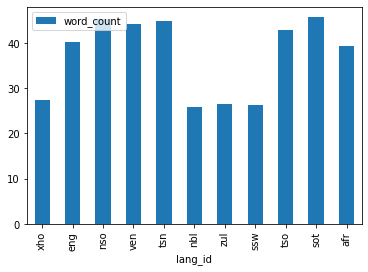

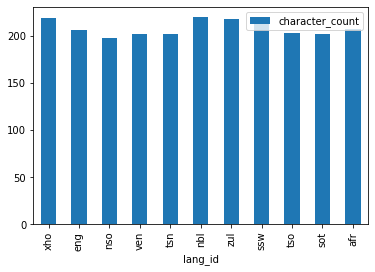

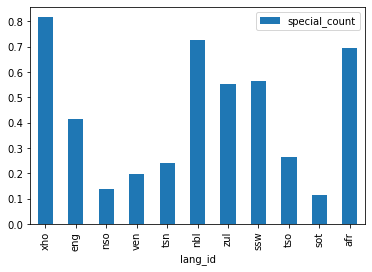

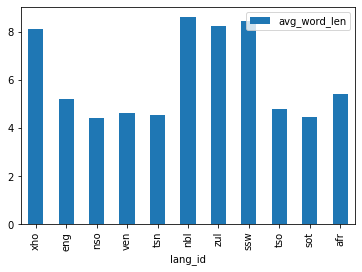

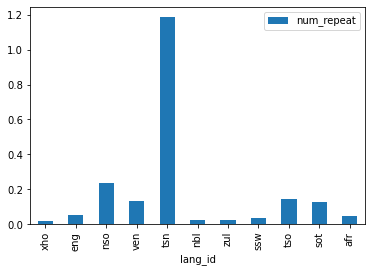

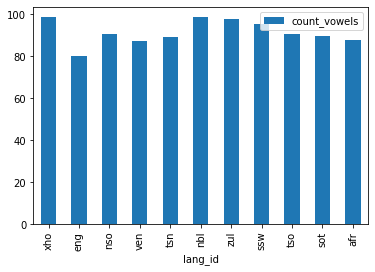

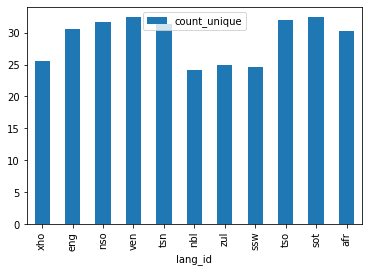

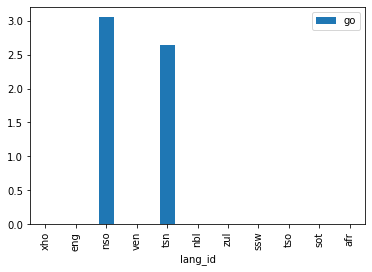

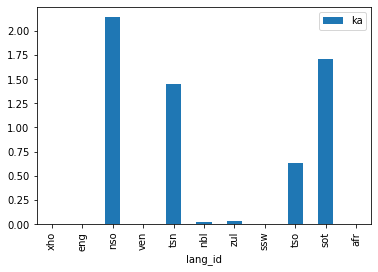

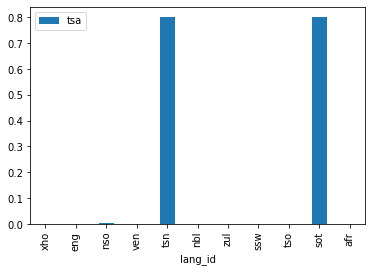

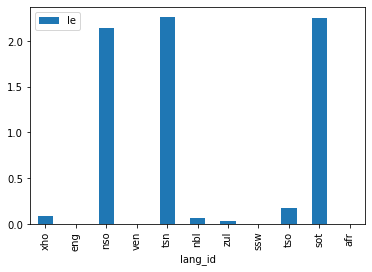

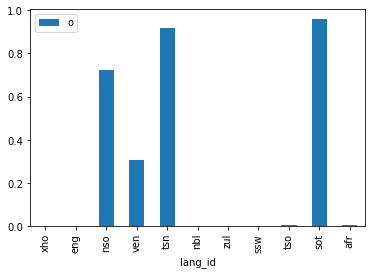

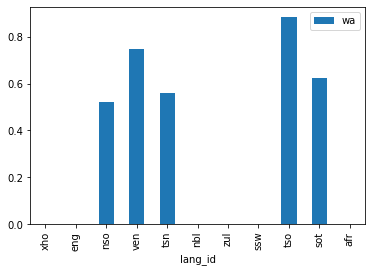

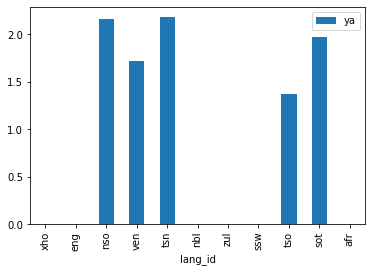

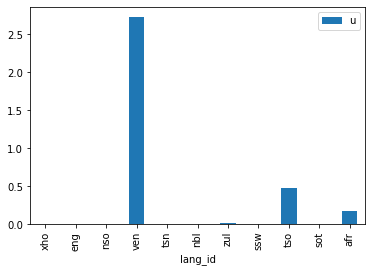

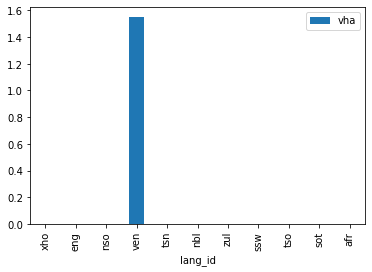

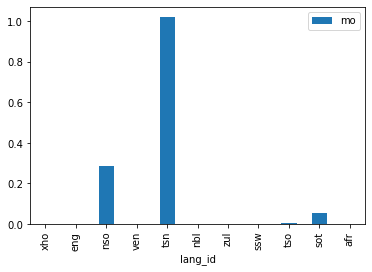

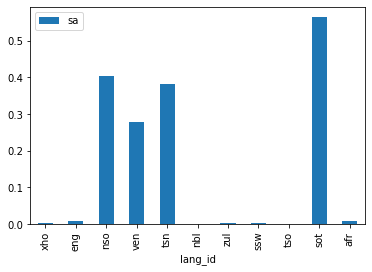

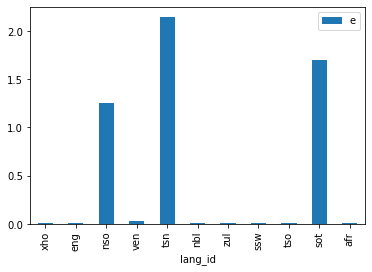

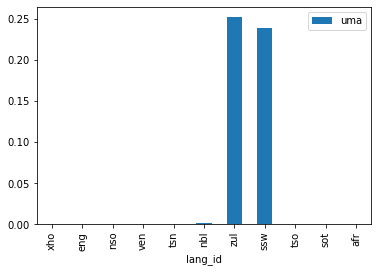

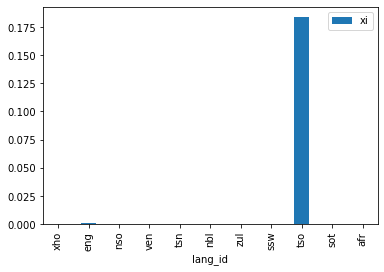

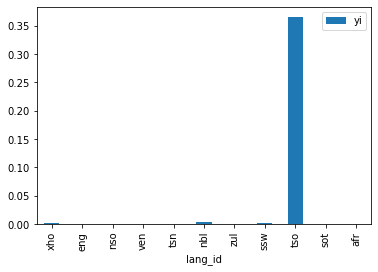

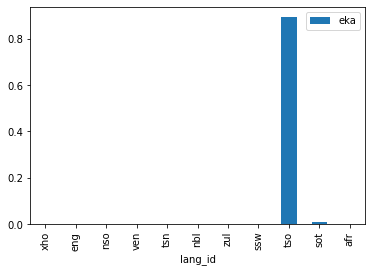

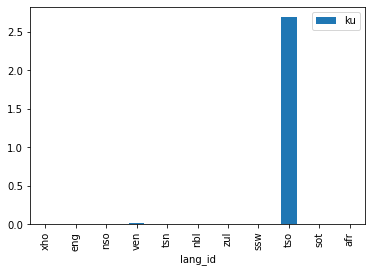

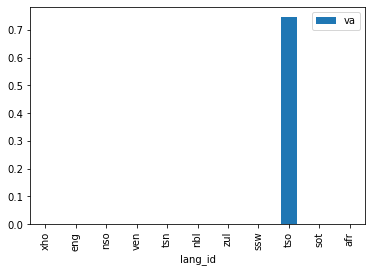

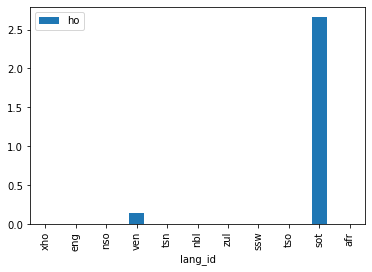

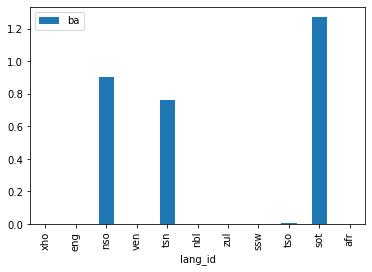

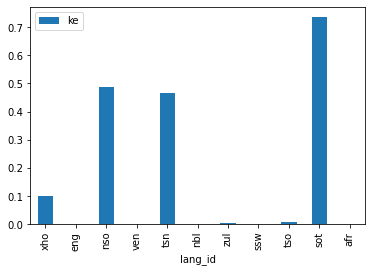

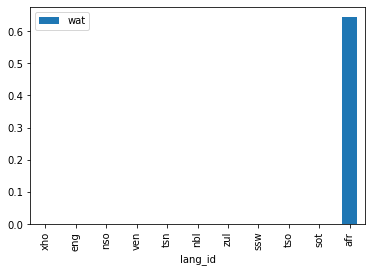

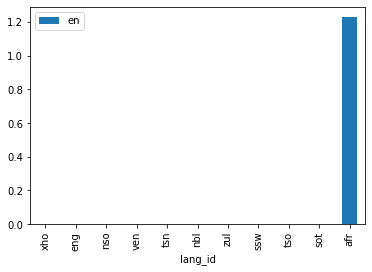

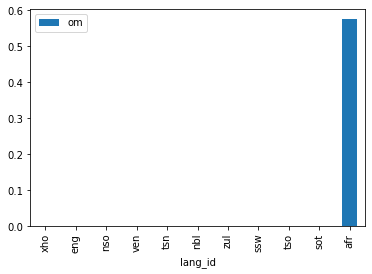

In [15]:
for col in meta_data.columns:
    if col == 'lang_id':
        continue
    meta_data.plot.bar(x='lang_id', y=col)

The bar graph shows that a lot of these metadata created can be good language indicators  

e.g. the word 'vha' seems used only by the lang_id `ven`, the language `tsn` shows very high levels on consecutive repetitions as seen by the bar plot for `num_repeat`, etc

<a id="four"></a>
## 4. Data Engineering
<a href=#cont>Back to Table of Contents</a>

It is helpful to use the entire text without much cleaning because even things such as stopwords are good indicators of a particular language

In [94]:
df_train = df.copy()
# Convert to lower case
df_train['text'] = df_train['text'].str.lower()

In [95]:
# create a list of labels. This will come in handy later
labels_id = list(df_train['lang_id'].unique())
labels_id

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']

In [18]:
# We now add those metadata to the training set
add_features(df_train)
add_features_from_list(df_train, special_words)
df_train.head(1)

lang_id  \
0     xho   

                                                                                                                                                                                                                           text  \
0  umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika   

   word_count  character_count  special_count  avg_word_len  num_repeat  \
0          24              197              1      8.208333           0   

   count_vowels  count_unique  go  ...  yi  eka  ku  va  ho  ba  ke  wat  en  \
0            89            23   0  ...   0    0   0   0   0   0   0    0   0   

   om  
0   0  

[1 rows x 33 columns]

In [19]:
# We next encode the labels into integar values by simply replacing the value with its corresponding index
# in the label_id array

def label_to_int(label):
    return labels_id.index(label)
df_train['lang_id'] = df_train['lang_id'].apply(label_to_int)

In [20]:
df_train.head(1)

lang_id  \
0        0   

                                                                                                                                                                                                                           text  \
0  umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika   

   word_count  character_count  special_count  avg_word_len  num_repeat  \
0          24              197              1      8.208333           0   

   count_vowels  count_unique  go  ...  yi  eka  ku  va  ho  ba  ke  wat  en  \
0            89            23   0  ...   0    0   0   0   0   0   0    0   0   

   om  
0   0  

[1 rows x 33 columns]

In [21]:
# We create a dataframe consisting only of the metadata this will come in handy later
X_meta = df_train.drop(['lang_id', 'text'], axis=1)
y_meta = df_train.lang_id

In [22]:
# We next vectorize the text data 
tf_vect = TfidfVectorizer(ngram_range = (1,2))
X_train_vect = tf_vect.fit_transform(df_train.text)
Y_train = df_train.lang_id

In [78]:
x_train, x_val, y_train, y_val = train_test_split(X_train_vect, Y_train, test_size=0.90)

<a id="five"></a>
## 5. Modelling
<a href=#cont>Back to Table of Contents</a>

We next try several different models to see which performs best on the data

In [79]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_val, y_val)

0.9840740740740741

In [80]:
log_reg_predict = log_reg.predict_proba(X_train_vect)
log_reg_predict

array([[0.40799266, 0.03793552, 0.03671703, ..., 0.03708439, 0.03651952,
        0.03961926],
       [0.3157291 , 0.04150489, 0.03926185, ..., 0.04651821, 0.03935671,
        0.04349182],
       [0.03730357, 0.74360365, 0.01669424, ..., 0.01635246, 0.01648213,
        0.02256306],
       ...,
       [0.05603686, 0.61092027, 0.0261091 , ..., 0.02533796, 0.02466273,
        0.03359512],
       [0.46037406, 0.03496629, 0.03289667, ..., 0.03354875, 0.03286268,
        0.03621565],
       [0.04776104, 0.02176744, 0.02459071, ..., 0.02518624, 0.627039  ,
        0.02239965]])

In [75]:
svc_lm = SVC(kernel="linear", probability=True)
svc_lm.fit(x_train, y_train)
svc_lm.score(x_val, y_val)

In [77]:
svm_predict = svc_lm.predict_proba(X_train_vect)
svm_predict

In [81]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_val, y_val)

0.9644107744107744

In [82]:
rf_predict = rf.predict_proba(X_train_vect)
rf_predict

array([[0.87, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.71, 0.  , 0.  , ..., 0.02, 0.  , 0.  ],
       [0.04, 0.9 , 0.01, ..., 0.  , 0.  , 0.03],
       ...,
       [0.01, 0.94, 0.01, ..., 0.  , 0.  , 0.02],
       [0.77, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.04, ..., 0.  , 0.68, 0.  ]])

In [83]:
NB_multi = MultinomialNB()
NB_multi.fit(x_train, y_train)
NB_multi.score(x_val, y_val)

0.985993265993266

In [84]:
nb_predict = NB_multi.predict_proba(X_train_vect)
nb_predict

array([[0.32320041, 0.06091669, 0.07090598, ..., 0.06480671, 0.0644545 ,
        0.06628142],
       [0.16678464, 0.07221988, 0.08202334, ..., 0.08436869, 0.07540638,
        0.07860761],
       [0.04100894, 0.5661813 , 0.04571607, ..., 0.04002456, 0.04174905,
        0.06168981],
       ...,
       [0.03747574, 0.59056126, 0.04683264, ..., 0.04066429, 0.04061892,
        0.05253715],
       [0.27226836, 0.06651664, 0.07344944, ..., 0.06805302, 0.06715837,
        0.07032607],
       [0.02734407, 0.02506646, 0.06321681, ..., 0.03473241, 0.61145836,
        0.02652426]])

In [85]:
d_clf = DecisionTreeClassifier()
d_clf.fit(x_train, y_train)
d_clf.score(x_val, y_val)

0.889090909090909

In [86]:
d_clf_predict = d_clf.predict_proba(X_train_vect)
d_clf_predict

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

All the models tried performed really well. 

We now attempt to improve model performance by creating new features from the predictions of our three best models, and combine that data with the metadata from earlier to create a new trainig set that we can feed to a different ML model

In [87]:
# sum predictions from three of the best 
total_predict = log_reg_predict + rf_predict + nb_predict

# create a dataframe from those predictions
df_predictions = pd.DataFrame(total_predict)
df_predictions.columns = labels

# concatanate the new df with the metadata dataframe
df_pred_meta = pd.concat([df_predictions, X_meta], axis=1)
df_pred_meta

xho       eng       nso       ven       tsn       nbl       zul  \
0      1.601193  0.098852  0.107623  0.113013  0.096068  0.209564  0.246731   
1      1.192514  0.113725  0.121285  0.181777  0.113650  0.330996  0.280735   
2      0.118313  2.209785  0.072410  0.060444  0.055924  0.087529  0.089266   
3      0.118794  0.066897  1.547121  0.070754  0.374542  0.172644  0.161786   
4      0.068843  0.047715  0.138106  1.938016  0.121860  0.067293  0.100000   
...         ...       ...       ...       ...       ...       ...       ...   
32995  0.051874  0.030381  0.788424  0.064800  1.453792  0.042609  0.042591   
32996  0.056824  0.036136  0.207711  0.090063  0.277998  0.055882  0.055863   
32997  0.103513  2.141482  0.082942  0.068607  0.060262  0.103464  0.107976   
32998  1.502642  0.101483  0.106346  0.109140  0.099869  0.232429  0.335569   
32999  0.115105  0.046834  0.127808  0.089027  0.240413  0.133557  0.125305   

            ssw       tso       sot  ...  yi  eka  ku  va  ho  ba  ke  wat  \
0      0.218190  0.101891  0.100974  ...   0    0   0   0   0   0   0    0   
1      0.277569  0.150887  0.114763  ...   0    0   0   0   0   0   0    0   
2      0.077468  0.056377  0.058231  ...   0    0   0   0   0   0   0    0   
3      0.107558  0.076599  0.233624  ...   0    0   0   0   0   1   0    0   
4      0.111925  0.223937  0.131632  ...   0    0   0   0   0   0   0    0   
...         ...       ...       ...  ...  ..  ...  ..  ..  ..  ..  ..  ...   
32995  0.040404  0.066901  0.385428  ...   0    0   0   0   0   0   2    0   
32996  0.054417  0.131327  1.993900  ...   0    1   0   0   3   1   2    0   
32997  0.094338  0.066002  0.065282  ...   0    0   0   0   0   0   0    0   
32998  0.204357  0.101602  0.100021  ...   0    0   0   0   0   0   0    0   
32999  0.094611  0.059919  1.918497  ...   0    0   0   0   3   0   1    0   

       en  om  
0       0   0  
1       0   0  
2       0   0  
3       0   0  
4       0   0  
...    ..  ..  
32995   0   0  
32996   0   0  
32997   0   0  
32998   0   0  
32999   0   0  

[33000 rows x 42 columns]

We now attempt to improve performance by training a new model on the intermediate dataset

In [88]:
i_lm = LogisticRegression()
i_lm.fit(df_pred_meta, Y_train)
i_lm.score(df_pred_meta, Y_train)

/home/ikechukwu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8998787878787878

In [89]:
i_nb = MultinomialNB()
i_nb.fit(df_pred_meta, Y_train)
i_nb.score(df_pred_meta, Y_train)

0.9453333333333334

<a id="six"></a>
## 6. Model performance
<a href=#cont>Back to Table of Contents</a>

We next look at how well some of our models are at correctly identifying the different languages

In [97]:
print(classification_report(Y_train, NB_multi.predict(X_train_vect), target_names=labels_id))

              precision    recall  f1-score   support

         xho       0.99      0.98      0.99      3000
         eng       0.99      1.00      0.99      3000
         nso       0.98      1.00      0.99      3000
         ven       1.00      1.00      1.00      3000
         tsn       1.00      0.99      0.99      3000
         nbl       1.00      0.93      0.96      3000
         zul       0.93      0.99      0.96      3000
         ssw       1.00      0.97      0.99      3000
         tso       0.99      1.00      1.00      3000
         sot       1.00      1.00      1.00      3000
         afr       1.00      1.00      1.00      3000

    accuracy                           0.99     33000
   macro avg       0.99      0.99      0.99     33000
weighted avg       0.99      0.99      0.99     33000



In [96]:
print(classification_report(Y_train, rf.predict(X_train_vect), target_names=labels_id))

              precision    recall  f1-score   support

         xho       0.97      0.94      0.95      3000
         eng       0.99      1.00      1.00      3000
         nso       0.99      1.00      0.99      3000
         ven       1.00      1.00      1.00      3000
         tsn       1.00      0.98      0.99      3000
         nbl       0.99      0.85      0.92      3000
         zul       0.78      0.97      0.86      3000
         ssw       0.99      0.90      0.95      3000
         tso       1.00      1.00      1.00      3000
         sot       1.00      1.00      1.00      3000
         afr       1.00      1.00      1.00      3000

    accuracy                           0.97     33000
   macro avg       0.97      0.97      0.97     33000
weighted avg       0.97      0.97      0.97     33000



These models show very high performance.

One way to improve them however is to take a look a the observations the model is misclassifing and see what new insights can be gained from them e.g. Perhaps We need to pay attention to a particular word or phrase etc

This was not possible in the mean time though due to time constraints.

<a id="seven"></a>
## 7. Model Selection
<a href=#cont>Back to Table of Contents</a>

It was observed that the Naive bais model produced the best result on kaggle

### Preparing for kaggle submission

In [98]:
# Augment the test data with meta data
add_features(df_test)
add_features_from_list(df_test, special_words)

# create a dataframe of just meta data
df_test_meta = df_test.drop(['index', 'text'], axis=1)

In [91]:
# convert text to lower case and vectorize
df_test['text'] = df_test['text'].str.lower()
X_test = tf_vect.transform(df_test.text)

In [92]:
# sum Predictions form best three and create a dataframe from concatenate with the metadata dataframe
total_test_predict = log_reg.predict_proba(X_test) + rf.predict_proba(X_test) + NB_multi.predict_proba(X_test)
df_test_predictions = pd.DataFrame(total_test_predict)
df_test_predictions.columns = labels
df_test_pred_meta = pd.concat([df_test_predictions, df_test_meta], axis=1)

In [99]:
# select model and data and generate csv file
predictions = NB_multi.predict(X_test)

predict_labels = []
for label in predictions:
    predict_labels.append(labels_id[label])
predict_labels = np.array(predict_labels)

df_CSV = pd.DataFrame({"index": df_test['index'].values,
                   "lang_id": predict_labels,
                  })

df_CSV.to_csv("language_predict.csv", index=False)

For basic models the naive baise model work better for kaggle submission implying that it is better tuned to handle the unknown data on kaggle dataset